#EDA and Data Preprocessing

### Importing necessary libraries and Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/10Acadamy/data/complaints.csv')
print("Dataset loaded. Shape:", df.shape)

print(df.head())

/tmp/ipython-input-1-3395799154.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/10Acadamy/data/complaints.csv')


Dataset loaded. Shape: (9609797, 18)
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else    

##Filter Relevant Records
I'm asked to keep only these 5 products:
 * "Credit card"
 * "Personal loan"
 * "Buy now, pay later"
 * "Savings account"
 * "Money transfer"

In [3]:
target_products = [
    "Credit card",
    "Personal loan",
    "Buy now, pay later",
    "Savings account",
    "Money transfer"
]

df_filtered = df[
    df["Product"].isin(target_products) &
    df["Consumer complaint narrative"].notna()
].copy()

##Basic EDA
A. Check product distribution

<Axes: title={'center': 'Complaint Count by Product'}, xlabel='Product'>

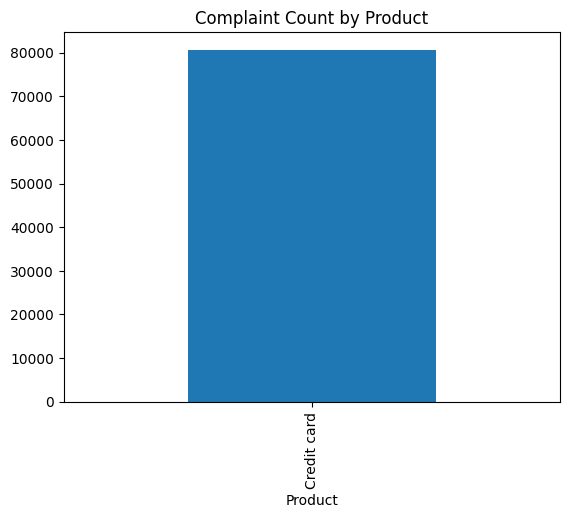

In [5]:
df_filtered["Product"].value_counts().plot(kind="bar", title="Complaint Count by Product")

B.Narrative length distribution:

<Axes: >

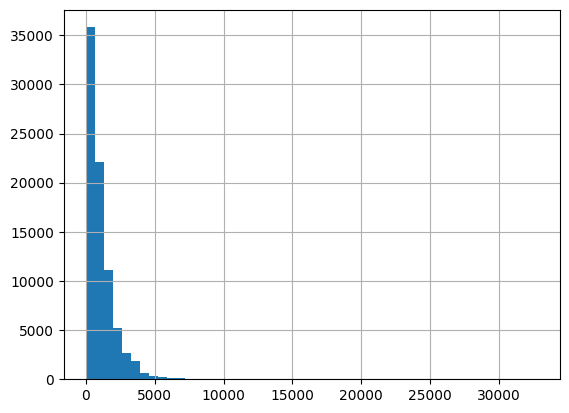

In [10]:
df_filtered["narrative_length"] = df_filtered["Consumer complaint narrative"].apply(len)
df_filtered["narrative_length"].hist(bins=50)

##Clean the Narrative

In [11]:
import re

def clean_text(text):
  text = text.lower()
  text = re.sub(r"\n", " ",text)
  text = re.sub(r"[^a-z0-9.,!?$% ]", "",text)
  text = re.sub(r"\s+", " ", text).strip()
  return text

df_filtered["clean_narrative"] = df_filtered["Consumer complaint narrative"].apply(clean_text)

##Save Cleaned Data

In [13]:
df_filtered.to_csv("/content/drive/MyDrive/10Acadamy/data/filtered_compliants.csv", index=False)